In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For display
pd.set_option('display.max_columns', None)

## D. Read Data → PostgreSQL - (Prepare data for EDA)


In [7]:
patients_df = pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\patients.csv')
sessions_df = pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\sessions.csv')
feedback_df = pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\feedback.csv')
clinics_df =pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\clinics.csv')
interventions_df =pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\interventions.csv')
drop_df = pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\dropout_flags.csv')

## E. EDA → (Exploratory Data Analysis)

Steps in EDA
 - Data Exploration
    - Head()
    - info()
    - describe()
 - Data Cleaning 
    - Identifying & Handling Missing Values
    - Identifying & Handling Duplicates
 - Data Transformation (Feature Engineering)
   - Standardizing data types (text, date, replacing values)
   - Log Transform (for highly skewed data e.g., income, prices)
   - Binning (Convert continuous variables into categorical bins e.g., age ranges)
   - Encoding (Convert categorical variables into numerical format (e.g., One-Hot, Label Encoding))
 - Data Distributions
    - Histograms for distributions of numerical features (age, bmi etc)- Also to check if the features are normally distributed or skewed (e.g., pain level or age should be somewhat evenly distributed just like we discovered in the last drop-in session).
    - Boxplots to detect outliers & handle them.
    - Pairplots to visualize relationships between multiple features.
 -  Correlation Analysis (dentify relationships between variables that may help in predictive modeling)
    - Correlation Matrix to understand feature dependencies.
    - Heatmap for visual representation of correlations.
 - Understanding Dropout Behavior
    - investigate the correlation between features and patient dropout.



In [8]:
patients_df.head()

,patient_id,age,gender,bmi,smoker,chronic_cond,injury_type,signup_date,referral_source,consent,clinic_id,insurance_type
0,1,29,Male,23.9,False,NaN,Knee,2025-04-27 00:12:44,Insurance,True,6,Public
1,2,68,Female,31.7,True,NaN,Shoulder,2024-11-28 00:12:44,Insurance,False,3,Public
2,3,64,Male,27.5,False,NaN,Hip,2024-10-10 00:12:44,GP,True,5,Public
3,4,41,Female,26.1,False,NaN,Back,2024-12-12 00:12:44,GP,True,2,Private-Premium
4,5,22,Female,21.3,False,NaN,Shoulder,2025-03-28 00:12:44,Insurance,True,4,Private-Basic


# Inspection and Data Cleaning

In [9]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   gender           5000 non-null   object 
 3   bmi              5000 non-null   float64
 4   smoker           5000 non-null   bool   
 5   chronic_cond     1931 non-null   object 
 6   injury_type      5000 non-null   object 
 7   signup_date      5000 non-null   object 
 8   referral_source  5000 non-null   object 
 9   consent          5000 non-null   bool   
 10  clinic_id        5000 non-null   int64  
 11  insurance_type   5000 non-null   object 
dtypes: bool(2), float64(1), int64(3), object(6)
memory usage: 400.5+ KB


There are some missing values in chronic_cond. Actually the missing values are those with no chronic disease

In [10]:
if pd.api.types.is_categorical_dtype(patients_df['chronic_cond']):
    patients_df['chronic_cond'] = patients_df['chronic_cond'].cat.add_categories(['No chronic'])

# Then, fill NaN values with "No chronic"
patients_df['chronic_cond'] = patients_df['chronic_cond'].fillna('No chronic')

In [11]:
# Check unique elements in each column and print them out
for column in patients_df.columns:
    unique_values = patients_df[column].unique()
    print(f"Unique values in '{column}':\n{unique_values}\n")

Unique values in 'patient_id':
[   1    2    3 ... 4998 4999 5000]

Unique values in 'age':
[29 68 64 41 22 83 47 77 63 70 31 42 49 51 20 54 28 67 79 82 45 39 78 23
 71 30 26 40 33 55 62 81 73 60 24 38 69 74 43 37 34 27 18 65 36 48 56 25
 61 75 58 32 84 21 46 72 19 66 80 35 57 59 50 52 53 76 44]

Unique values in 'gender':
['Male' 'Female']

Unique values in 'bmi':
[23.9 31.7 27.5 26.1 21.3 19.4 29.5 27.3 18.1 32.6 28.9 22.  21.6 21.7
 23.1 25.4 24.4 23.  26.2 21.  23.8 24.7 28.2 21.9 25.3 26.  19.  21.5
 19.5 31.6 32.3 28.6 20.3 27.  24.5 20.7 25.1 18.7 30.4 22.6 26.8 23.2
 25.6 32.5 28.1 31.2 30.1 30.7 20.1 21.8 23.4 24.  22.8 23.7 22.9 25.5
 28.5 19.8 33.9 17.4 28.7 28.  20.6 29.4 26.3 26.5 29.9 24.8 27.9 25.7
 18.3 20.5 18.6 25.2 22.5 24.2 27.8 22.3 30.9 29.6 30.  23.3 22.2 24.3
 23.5 31.4 27.2 32.7 32.2 19.2 22.4 21.1 25.  33.8 26.9 26.4 29.  18.9
 17.9 26.6 27.1 30.8 29.7 26.7 20.2 30.2 23.6 20.  17.6 17.3 27.7 29.2
 25.8 22.7 24.1 28.4 25.9 27.4 31.3 31.8 30.5 32.4 29.3 31.1 34.

In [12]:
# Convert object columns to 'category' type
category_columns = ['consent', 'clinic_id','insurance_type','referral_source','injury_type',
                    'chronic_cond','smoker','gender']
for col in category_columns:
    patients_df[col] = patients_df[col].astype('category')

# Convert date columns to datetime
date_columns = ['signup_date']

for col in date_columns:
    patients_df[col] = pd.to_datetime(patients_df[col])

# Check the updated data types
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   patient_id       5000 non-null   int64         
 1   age              5000 non-null   int64         
 2   gender           5000 non-null   category      
 3   bmi              5000 non-null   float64       
 4   smoker           5000 non-null   category      
 5   chronic_cond     5000 non-null   category      
 6   injury_type      5000 non-null   category      
 7   signup_date      5000 non-null   datetime64[ns]
 8   referral_source  5000 non-null   category      
 9   consent          5000 non-null   category      
 10  clinic_id        5000 non-null   category      
 11  insurance_type   5000 non-null   category      
dtypes: category(8), datetime64[ns](1), float64(1), int64(2)
memory usage: 196.9 KB


In [13]:
#checking for duplicates
patients_df.duplicated().sum()

0

#### F-2 Binning (putting the age into categories)

In [14]:
import numpy as np
# Add age group column for segmentation
bins = [0, 18, 35, 55, np.inf]
labels = ['0-18', '19-35', '36-55', '55+']
patients_df['age_group'] = pd.cut(patients_df['age'], bins=bins, labels=labels)
patients_df.head(2)

,patient_id,age,gender,bmi,smoker,chronic_cond,injury_type,signup_date,referral_source,consent,clinic_id,insurance_type,age_group
0,1,29,Male,23.9,False,No chronic,Knee,2025-04-27 00:12:44,Insurance,True,6,Public,19-35
1,2,68,Female,31.7,True,No chronic,Shoulder,2024-11-28 00:12:44,Insurance,False,3,Public,55+


F-3 : TASK 4 (Data Transformation)
- Log Transform (for highly skewed data e.g., income, prices)
- Encoding (Convert categorical variables into numerical format (e.g., One-Hot, Label Encoding))

In [15]:
patients_df.describe()

,patient_id,age,bmi,signup_date
count,5000.000000,5000.000000,5000.000000,5000
mean,2500.500000,50.907200,25.174580,2024-12-10 09:48:44
min,1.000000,18.000000,17.000000,2024-06-13 00:12:44
25%,1250.750000,34.000000,22.400000,2024-09-08 00:12:44
50%,2500.500000,51.000000,25.100000,2024-12-10 12:12:44
75%,3750.250000,68.000000,27.700000,2025-03-11 00:12:44
max,5000.000000,84.000000,38.800000,2025-06-12 00:12:44
std,1443.520003,19.403203,3.769633,NaN


Minimal level of skewness

# G. Data Distribution 

#### G-1  Boxplot for distributions of numerical features

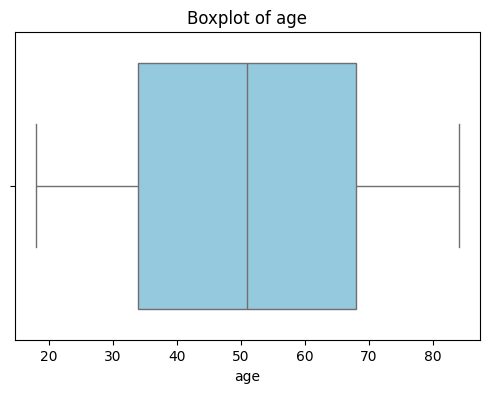

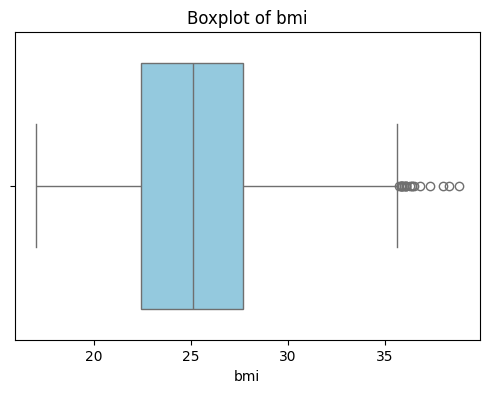

In [16]:
# List of numerical columns
numerical_cols = ['age', 'bmi']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=patients_df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

#### G-2  TASK 5 (Data Distribution)
- Boxplots to detect outliers & handle them.
- Pairplots to visualize relationships between multiple features.

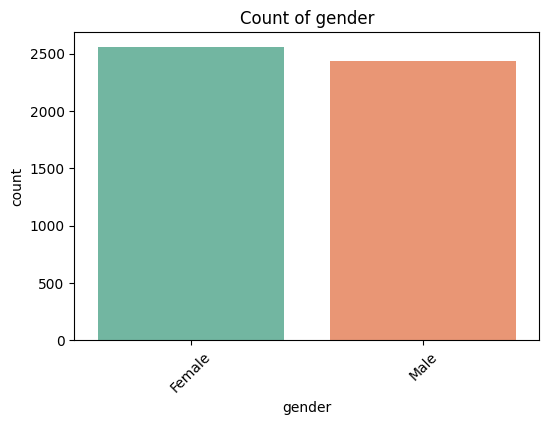

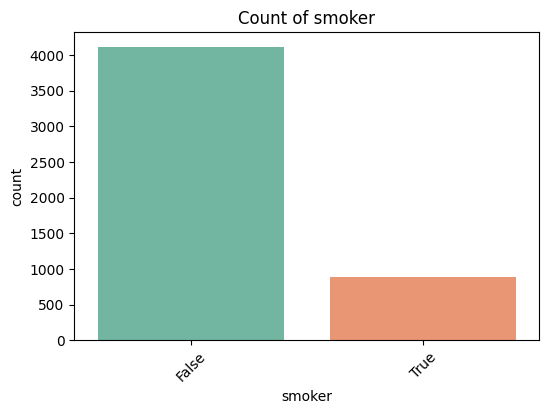

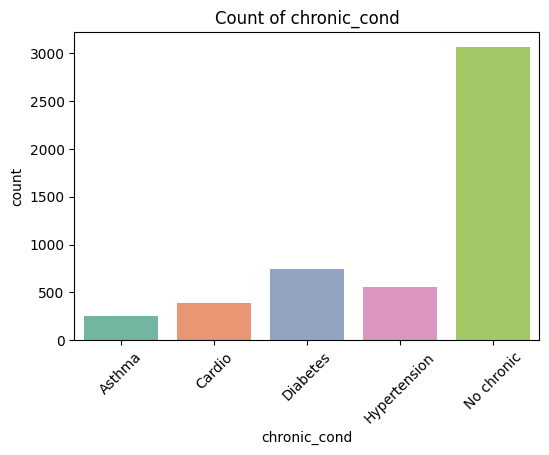

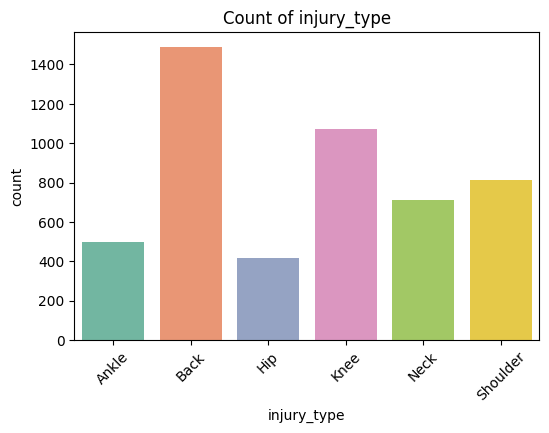

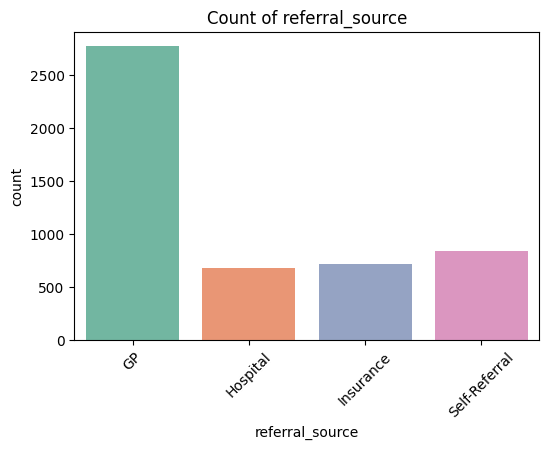

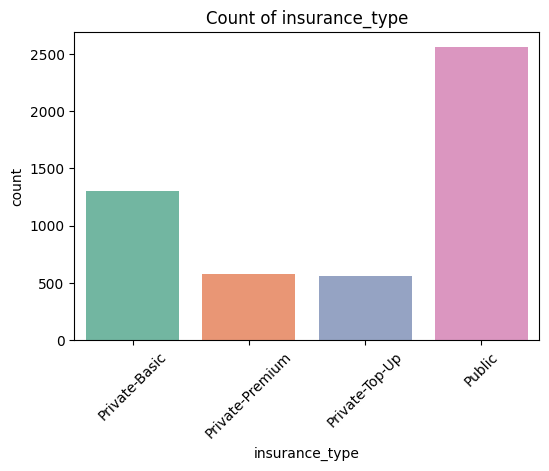

In [17]:
categorical_cols = ['gender', 'smoker', 'chronic_cond', 'injury_type', 'referral_source', 'insurance_type']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=patients_df, x=col, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


# Feature Engineering

In [18]:
# Signup features
patients_df['signup_month'] = patients_df['signup_date'].dt.month
patients_df['signup_dayofweek'] = patients_df['signup_date'].dt.day_name()

# BMI categories
patients_df['bmi_category'] = pd.cut(patients_df['bmi'],
                                     bins=[0, 18.5, 24.9, 29.9, 100],
                                     labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Chronic condition binary
patients_df['has_chronic_cond'] = patients_df['chronic_cond'].apply(lambda x: 0 if x == 'No chronic' else 1)

# H. CORRELATION ANALYSIS

#### H-1 TASK 6 (Correlation Analysis)

-  Correlation Analysis (dentify relationships between variables that may help in predictive modeling)
- Correlation Matrix to understand feature dependencies.
- Heatmap for visual representation of correlations.

# Clustering Analysis

In [19]:
sessions_df.head()

,session_id,patient_id,date,week,duration,pain_level,exercise_type,home_adherence_pc,satisfaction,therapist_id
0,315291cb2a5c4c29a65810cd5ec7dcb4,1,2025-05-02 00:12:44,1,40,6,Balance,51,6,1162
1,2a62e7445d3f43b8849a514a0c27210a,1,2025-04-30 00:12:44,1,59,6,Hydrotherapy,100,7,1022
2,5437794f3f3246ca8e582b983e9d9766,1,2025-05-08 00:12:44,2,33,4,Stretching,80,6,1010
3,e0c78ac4bd6a4ed8b02c10ee0ae11348,1,2025-05-05 00:12:44,2,44,4,Ultrasound,85,8,1161
4,3940a79f93934154a4c4072b1079a136,1,2025-05-14 00:12:44,3,58,4,Stretching,44,3,1185


# Feature Engineering from sessions_df

In [20]:
# Convert date
sessions_df['date'] = pd.to_datetime(sessions_df['date'])

# Sort
sessions_df = sessions_df.sort_values(['patient_id', 'date'])

# Group by patient and engineer session-level features
progress_summary = sessions_df.groupby('patient_id').agg({
    'pain_level': ['first', 'last', 'mean'],
    'satisfaction': 'mean',
    'home_adherence_pc': ['mean', 'std'],
    'duration': 'mean',
    'week': 'nunique'  # to get engagement span
})

# Flatten multi-index columns
progress_summary.columns = ['_'.join(col).strip() for col in progress_summary.columns.values]
progress_summary = progress_summary.reset_index()

# Derived features
progress_summary['pain_delta'] = progress_summary['pain_level_first'] - progress_summary['pain_level_last']
progress_summary['pain_pct_change'] = (
    progress_summary['pain_delta'] / progress_summary['pain_level_first'].replace(0, np.nan)
).fillna(0)

progress_summary.rename(columns={
    'home_adherence_pc_mean': 'avg_home_adherence',
    'home_adherence_pc_std': 'adherence_variability',
    'duration_mean': 'avg_session_duration',
    'satisfaction_mean': 'avg_satisfaction',
    'week_nunique': 'active_weeks'
}, inplace=True)

progress_summary.head()

,patient_id,pain_level_first,pain_level_last,pain_level_mean,avg_satisfaction,avg_home_adherence,adherence_variability,avg_session_duration,active_weeks,pain_delta,pain_pct_change
0,1,6,1,2.150000,6.500000,77.750000,19.983875,41.750000,12,5,0.833333
1,2,5,1,2.250000,7.000000,61.625000,12.682243,33.875000,5,4,0.800000
2,3,6,1,2.470588,5.941176,73.705882,13.873377,41.470588,11,5,0.833333
3,4,6,1,2.000000,6.647059,69.764706,15.176171,47.588235,12,5,0.833333
4,5,5,1,2.333333,6.416667,73.666667,14.742230,33.833333,8,4,0.800000


# Merge sessions and patients datasets

In [21]:
# Merge with patient demographic/clinical info
full_df = pd.merge(patients_df, progress_summary, on='patient_id', how='left')

# Drop any columns not needed or redundant
selected_cols = [
    'age', 'bmi', 'smoker', 'gender', 'consent',
    'pain_delta', 'pain_pct_change', 'avg_home_adherence',
    'adherence_variability', 'avg_satisfaction',
    'avg_session_duration', 'active_weeks'
]

In [22]:
# --- defining the variables

numerical_features = [
    'age', 'bmi',
    'pain_level_mean', 'avg_satisfaction', 'avg_home_adherence',
    'adherence_variability', 'pain_delta', 'pain_pct_change'
]


categorical_features = [
    'gender', 'smoker', 'chronic_cond', 'injury_type'
]


# Convert categorical features to string

full_df[categorical_features] = full_df[categorical_features].astype("string")

## Preprocessing Pipeline

In [24]:
# ---- build a preprocessing pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


numerical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])


categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# --- put them together
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_pipeline, numerical_features),
    ("cat", categorical_pipeline, categorical_features)
])

In [25]:
pat_clust = preprocessor.fit_transform(full_df)

In [26]:
# -- auto dimension reduction
# -- PCA to help retain the variance of features
from sklearn.decomposition import PCA

pca = PCA (n_components=0.05, random_state=45)

x_reduced = pca.fit_transform(pat_clust)

# K means clustering

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def evaluate_kmeans(X, k_range=range(2, 12), random_state=42):
    wcss = []
    sils = []
    
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        preds = km.fit_predict(x_reduced)
        
        # Inertia = Within-Cluster Sum of Squares (rubber band effect)
        wcss.append(km.inertia_)
        
        # Silhouette Score
        score = silhouette_score(x_reduced, preds)
        sils.append(score)
        
        print(f"K={k}: Inertia={km.inertia_:.2f}, Silhouette={score:.4f}")
    
    # Plotting
    plt.figure(figsize=(12, 5))

    # Rubber band effect (Inertia)
    plt.subplot(1, 2, 1)
    plt.plot(k_range, wcss, marker='o')
    plt.title("Elbow Method (Inertia)")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("WCSS (Inertia)")
    
    # Silhouette Score
    plt.subplot(1, 2, 2)
    plt.plot(k_range, sils, marker='s', color='green')
    plt.title("Silhouette Scores")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Silhouette Score")
    
    plt.tight_layout()
    plt.show()
    
    return wcss, sils

K=2: Inertia=3931.76, Silhouette=0.5878
K=3: Inertia=2040.53, Silhouette=0.5955
K=4: Inertia=1153.28, Silhouette=0.5858
K=5: Inertia=667.66, Silhouette=0.6148
K=6: Inertia=344.07, Silhouette=0.6429
K=7: Inertia=189.48, Silhouette=0.6484
K=8: Inertia=146.16, Silhouette=0.6141
K=9: Inertia=114.70, Silhouette=0.5897
K=10: Inertia=89.97, Silhouette=0.5620
K=11: Inertia=75.69, Silhouette=0.5576


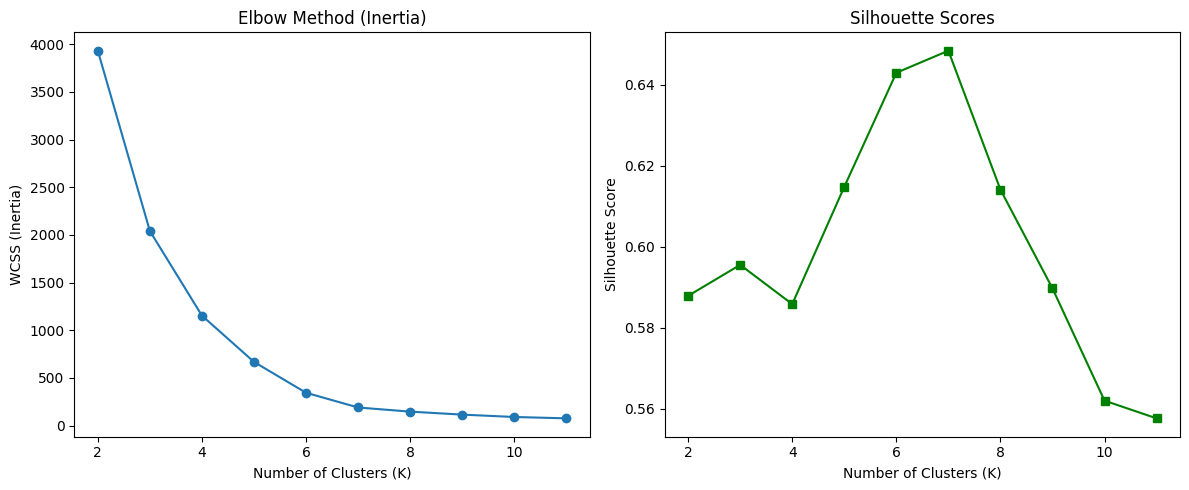

In [28]:
wcss, sils = evaluate_kmeans(x_reduced)

In [29]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.neighbors import NearestNeighbors
k_opt =7

kmeans = KMeans(n_clusters=k_opt,n_init='auto',algorithm='lloyd',
                 random_state=42)

clusters = kmeans.fit_predict(x_reduced)

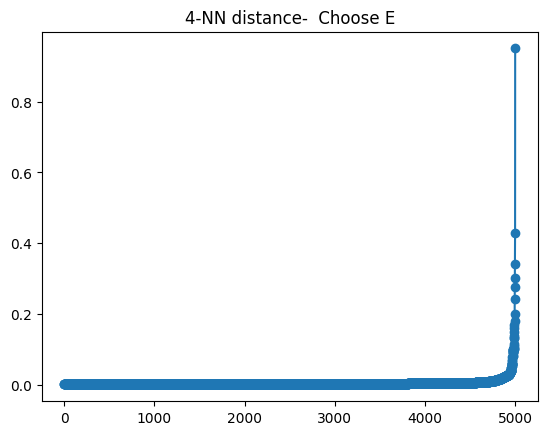

In [30]:
# ---DBSCAN

knn =NearestNeighbors(n_neighbors=k_opt).fit(x_reduced)
dists = np.sort(knn.kneighbors(x_reduced)[0][:,-1])

plt.figure; plt.plot(dists,'o-'); plt.title("4-NN distance-  Choose E"); plt.show()

DBSCAN valid-cluster silhouette: 0.660


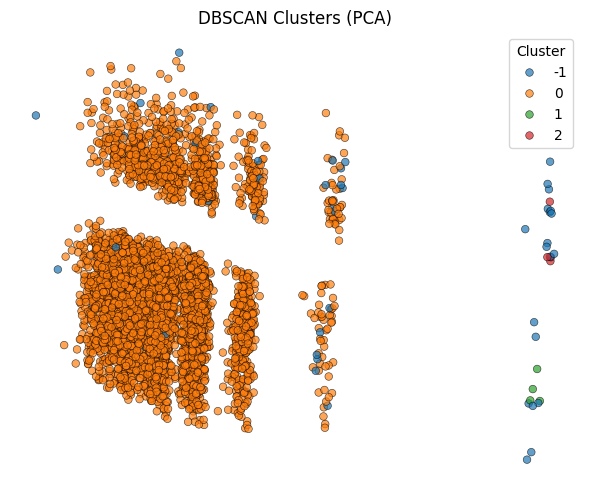

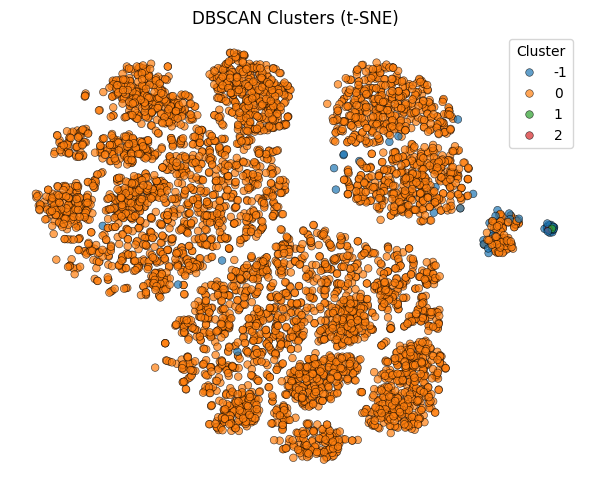

In [31]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# --- DBSCAN Clustering ---
db = DBSCAN(eps=2.3, min_samples=4).fit(pat_clust)
db_labels = db.labels_

# --- Silhouette Score (excluding noise) ---
if len(set(db_labels)) > 1 and len(set(db_labels)) != 1 + (1 if -1 in db_labels else 0):
    sil_db = silhouette_score(pat_clust[db_labels != -1], db_labels[db_labels != -1])
    print(f"DBSCAN valid-cluster silhouette: {sil_db:.3f}")
else:
    print("Silhouette score not applicable: less than 2 valid clusters.")
    sil_db = None

# --- Dimensionality Reduction for Visualization ---
pca_2d = PCA(n_components=2, random_state=42).fit_transform(pat_clust)
tsne_2d = TSNE(n_components=2, perplexity=40, init="pca", random_state=42).fit_transform(pat_clust)


# --- Plot Function ---
def scatter_2d(mat, labels, title):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=mat[:, 0], y=mat[:, 1], hue=labels, palette='tab10', s=30, alpha=0.7, edgecolor='k')
    plt.title(title)
    plt.axis('off')
    plt.legend(loc='best', title='Cluster')
    plt.tight_layout()
    plt.show()

# --- Visualize Clusters ---
scatter_2d(pca_2d, db_labels, "DBSCAN Clusters (PCA)")
scatter_2d(tsne_2d, db_labels, "DBSCAN Clusters (t-SNE)")

## Predictive Modeling

In [150]:
# -- merge drop_df with full_df
pred_df = pd.merge(full_df, drop_df, on='patient_id', how='left')

pred_df.head()

,patient_id,age,gender,bmi,smoker,chronic_cond,injury_type,signup_date,referral_source,consent,clinic_id,insurance_type,age_group,signup_month,signup_dayofweek,bmi_category,has_chronic_cond,pain_level_first,pain_level_last,pain_level_mean,avg_satisfaction,avg_home_adherence,adherence_variability,avg_session_duration,active_weeks,pain_delta,pain_pct_change,dropout,dropout_week
0,1,29,Male,23.9,False,No chronic,Knee,2025-04-27 00:12:44,Insurance,True,6,Public,19-35,4,Sunday,Normal,0,6,1,2.150000,6.500000,77.750000,19.983875,41.750000,12,5,0.833333,False,NaN
1,2,68,Female,31.7,True,No chronic,Shoulder,2024-11-28 00:12:44,Insurance,False,3,Public,55+,11,Thursday,Obese,0,5,1,2.250000,7.000000,61.625000,12.682243,33.875000,5,4,0.800000,False,NaN
2,3,64,Male,27.5,False,No chronic,Hip,2024-10-10 00:12:44,GP,True,5,Public,55+,10,Thursday,Overweight,0,6,1,2.470588,5.941176,73.705882,13.873377,41.470588,11,5,0.833333,False,NaN
3,4,41,Female,26.1,False,No chronic,Back,2024-12-12 00:12:44,GP,True,2,Private-Premium,36-55,12,Thursday,Overweight,0,6,1,2.000000,6.647059,69.764706,15.176171,47.588235,12,5,0.833333,False,NaN
4,5,22,Female,21.3,False,No chronic,Shoulder,2025-03-28 00:12:44,Insurance,True,4,Private-Basic,19-35,3,Friday,Normal,0,5,1,2.333333,6.416667,73.666667,14.742230,33.833333,8,4,0.800000,False,NaN


In [151]:
# --- Data cleaning

# drop irrelevant or highly correlated features
pred_df = pred_df.drop(columns=['dropout_week','patient_id','signup_dayofweek',
                                'chronic_cond','pain_delta','pain_pct_change',
                                'pain_level_mean','age','bmi'], errors='ignore')

In [152]:
# Grouping into 'Public' and 'Private'
pred_df['insurance_type'] = pred_df['insurance_type'].replace({
    'Private-Premium': 'Private',
    'Private-Basic': 'Private',
    'Private-Top-Up': 'Private'
    })

pred_df['referral_source'] = pred_df['referral_source'].replace({
    'Insurance': 'Professional',
    'GP': 'Professional',
    'Hospital': 'Professional',
    'Self-Referral': 'Self'
})


# bmi
bmi_mapping = {
    'Underweight': 0,
    'Normal': 1,
    'Overweight': 2,
    'Obese': 3
}

# Apply mapping
pred_df['bmi_category'] = pred_df['bmi_category'].map(bmi_mapping)


# age_group
age_mapping = {
    '0-18': 0,
    '19-35': 1,
    '36-55': 2,
    '55+': 3
}

# Apply mapping
pred_df['age_group'] = pred_df['age_group'].map(age_mapping)


In [153]:
# missing values
pred_df.isnull().mean()

gender                   0.0
smoker                   0.0
injury_type              0.0
signup_date              0.0
referral_source          0.0
consent                  0.0
clinic_id                0.0
insurance_type           0.0
age_group                0.0
signup_month             0.0
bmi_category             0.0
has_chronic_cond         0.0
pain_level_first         0.0
pain_level_last          0.0
avg_satisfaction         0.0
avg_home_adherence       0.0
adherence_variability    0.0
avg_session_duration     0.0
active_weeks             0.0
dropout                  0.0
dtype: float64

In [154]:
pred_df.head()

,gender,smoker,injury_type,signup_date,referral_source,consent,clinic_id,insurance_type,age_group,signup_month,bmi_category,has_chronic_cond,pain_level_first,pain_level_last,avg_satisfaction,avg_home_adherence,adherence_variability,avg_session_duration,active_weeks,dropout
0,Male,False,Knee,2025-04-27 00:12:44,Professional,True,6,Public,1,4,1,0,6,1,6.500000,77.750000,19.983875,41.750000,12,False
1,Female,True,Shoulder,2024-11-28 00:12:44,Professional,False,3,Public,3,11,3,0,5,1,7.000000,61.625000,12.682243,33.875000,5,False
2,Male,False,Hip,2024-10-10 00:12:44,Professional,True,5,Public,3,10,2,0,6,1,5.941176,73.705882,13.873377,41.470588,11,False
3,Female,False,Back,2024-12-12 00:12:44,Professional,True,2,Private,2,12,2,0,6,1,6.647059,69.764706,15.176171,47.588235,12,False
4,Female,False,Shoulder,2025-03-28 00:12:44,Professional,True,4,Private,1,3,1,0,5,1,6.416667,73.666667,14.742230,33.833333,8,False


In [155]:

from sklearn.preprocessing import LabelEncoder
# -------------------------------
# Feature Groups
num_features = [
    "pain_level_first", "pain_level_last",
    "avg_satisfaction", "avg_home_adherence", "adherence_variability",
    "avg_session_duration", "active_weeks"
]

label = [
    "gender", "smoker", "referral_source",
    "consent", "insurance_type",  
    "bmi_category", "has_chronic_cond"
]

high_card_cat = ["injury_type"]

# -------------------------------
# Manual Label Encoding
label_encoders = {}
for col in label:
    le = LabelEncoder()
    pred_df[col] = le.fit_transform(pred_df[col])
    label_encoders[col] = le

    # Print the mapping for reference
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"{col}: {mapping}")

# -------------------------------
# Preprocessing Pipelines
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

high_card_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# -------------------------------
# Full Column Transformer
ml_preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("high_cat", high_card_pipeline, high_card_cat),
    ("label", "passthrough", label)  # passthrough manually encoded categorical columns
])


gender: {'Female': 0, 'Male': 1}
smoker: {'False': 0, 'True': 1}
referral_source: {'Professional': 0, 'Self': 1}
consent: {0.0: 0, 1.0: 1}
insurance_type: {'Private': 0, 'Public': 1}
bmi_category: {0: 0, 1: 1, 2: 2, 3: 3}
has_chronic_cond: {0: 0, 1: 1}


## Model Building

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [ ]:
# Split  data
x = pred_df.drop(columns=["dropout","signup_date"], axis=1)
y = pred_df["dropout"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [158]:
print(y.value_counts())
print("\nProportions:\n")
print(y.value_counts(normalize=True))

dropout
False    4919
True       81
Name: count, dtype: int64

Proportions:

dropout
False    0.9838
True     0.0162
Name: proportion, dtype: float64


In [ ]:
# models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000,class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Evaluate each model
for name, model in models.items():
    pipeline = ImbPipeline([
        ("preprocessing", ml_preprocessor),
        ("smote", SMOTETomek(random_state=42)),
        ("classifier", model)
    ])

    # Train
    pipeline.fit(x_train, y_train)

    # Predict
    y_pred = pipeline.predict(x_test)
    y_proba = pipeline.predict_proba(x_test)[:, 1]

    # Evaluation
    roc = roc_auc_score(y_test, y_proba)
    cv = cross_val_score(pipeline, x, y, cv=5, scoring="f1").mean()

    print(f"\n📊 Model: {name}")
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc:.4f}")
    print(f"Cross-Validated F1 Score: {cv:.4f}")


📊 Model: Logistic Regression
Classification Report:

              precision    recall  f1-score   support

       False       1.00      0.83      0.91       984
        True       0.09      1.00      0.16        16

    accuracy                           0.84      1000
   macro avg       0.54      0.92      0.54      1000
weighted avg       0.99      0.84      0.90      1000

ROC AUC Score: 0.9502
Cross-Validated F1 Score: 0.1660

📊 Model: Random Forest
Classification Report:

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       984
        True       0.00      0.00      0.00        16

    accuracy                           0.98      1000
   macro avg       0.49      0.50      0.50      1000
weighted avg       0.97      0.98      0.98      1000

ROC AUC Score: 0.9449
Cross-Validated F1 Score: 0.0422

📊 Model: XGBoost
Classification Report:

              precision    recall  f1-score   support

       False       0.99      0.99    

## Hyperparameter Tuning

In [172]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define param grids
param_distributions = {
    "Logistic Regression": {
        "classifier__C": uniform(0.01, 10),
        "classifier__penalty": ["l2"],
        "classifier__solver": ["lbfgs", "liblinear"],
    },

    "Random Forest": {
        "classifier__n_estimators": randint(50, 200),
        "classifier__max_depth": [None, 5, 10, 20],
        "classifier__min_samples_split": randint(2, 10),
        "classifier__min_samples_leaf": randint(1, 5),
    },

    "XGBoost": {
        "classifier__n_estimators": randint(50, 200),
        "classifier__max_depth": randint(3, 10),
        "classifier__learning_rate": uniform(0.01, 0.3),
        "classifier__subsample": uniform(0.5, 0.5),
        "classifier__colsample_bytree": uniform(0.5, 0.5),
    }
}

In [173]:
best_models = {}

for name, model in models.items():
    print(f"\n🔍 Tuning: {name}")

    pipeline = ImbPipeline([
        ("preprocessing", ml_preprocessor),
        ("smote", SMOTETomek(random_state=42)),
        ("classifier", model)
    ])

    # Setup RandomizedSearchCV
    search = RandomizedSearchCV(
        pipeline,
        param_distributions[name],
        n_iter=20,  # try 20 random combinations
        cv=5,
        scoring="f1",
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    search.fit(x_train, y_train)

    # Best model
    best_models[name] = search.best_estimator_

    # Predict on test set
    y_pred = search.predict(x_test)
    y_proba = search.predict_proba(x_test)[:, 1]

    # Evaluate
    print("Best Parameters:", search.best_params_)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
    print(f"Best CV F1 Score: {search.best_score_:.4f}")



🔍 Tuning: Logistic Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'classifier__C': 0.017787658410143285, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.81      0.90       984
        True       0.08      1.00      0.15        16

    accuracy                           0.82      1000
   macro avg       0.54      0.91      0.52      1000
weighted avg       0.99      0.82      0.88      1000

ROC AUC Score: 0.9507
Best CV F1 Score: 0.1514

🔍 Tuning: Random Forest
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 139}
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.91      0.95       984
        True      

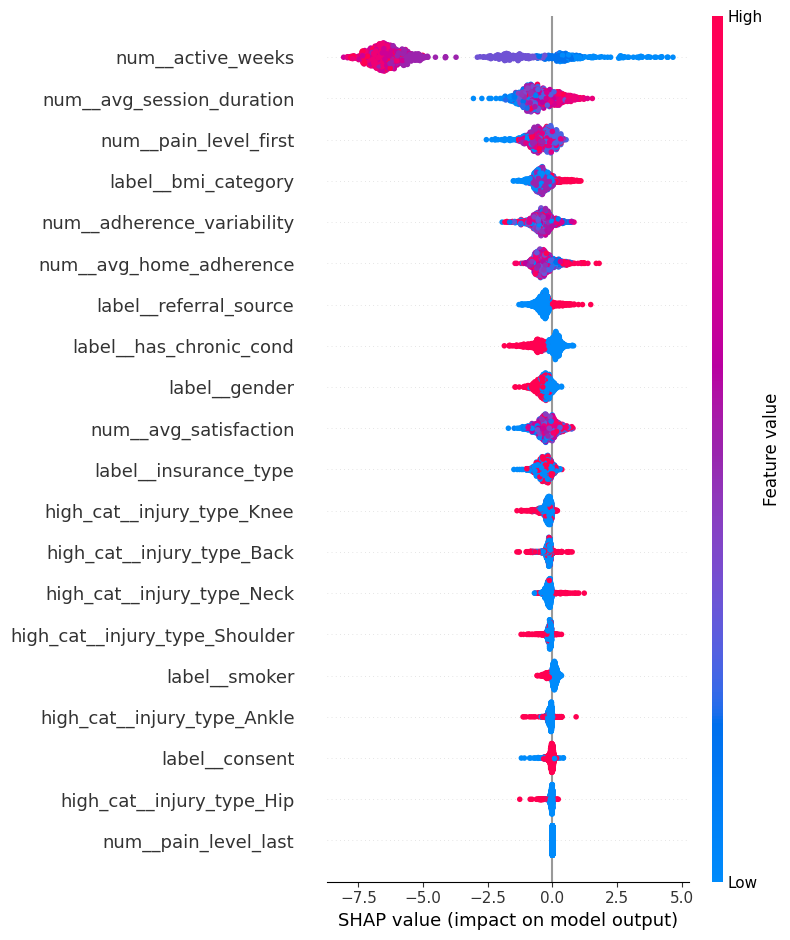

In [ ]:
# Fit only on the training data
ml_preprocessor.fit(x_train)

# Transform both train and test sets
x_train_transformed = ml_preprocessor.transform(x_train)
x_test_transformed = ml_preprocessor.transform(x_test)

# This only works if all transformers support get_feature_names_out
feature_names = ml_preprocessor.get_feature_names_out()

x_train_transformed = pd.DataFrame(x_train_transformed, columns=feature_names)
x_test_transformed = pd.DataFrame(x_test_transformed, columns=feature_names)

import shap

# For tree-based models
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(x_test_transformed)

# summary bar
shap.summary_plot(shap_values, x_test_transformed)